# Project: 1

# Performing Analysis of Meteorological Data


**By Yashwant Kumar Aaditya**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline

**1] Read Dataset**

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/yashwantaditya009/Internship_at_suvenconsultants/main/weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


**2] Describing the dataset**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [4]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


**3]Checking null value present in dataset or not**

In [5]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [6]:
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

**Before moving on visulization, we have convert formatted date to datetype object**

In [7]:
#Using infer datetime it will automaticall detect format and convert the column to datetime
#df['Formatted Date']=pd.to_datetime(df['Formatted Date'],infer_datetime_format=True)
df['Formatted Date']=pd.to_datetime(df['Formatted Date'],utc=True)

In [8]:
df.dtypes

Formatted Date              datetime64[ns, UTC]
Summary                                  object
Precip Type                              object
Temperature (C)                         float64
Apparent Temperature (C)                float64
Humidity                                float64
Wind Speed (km/h)                       float64
Wind Bearing (degrees)                  float64
Visibility (km)                         float64
Loud Cover                              float64
Pressure (millibars)                    float64
Daily Summary                            object
dtype: object

**After converting object to datetime.**

In [9]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [10]:
df['Formatted Date']

0       2006-03-31 22:00:00+00:00
1       2006-03-31 23:00:00+00:00
2       2006-04-01 00:00:00+00:00
3       2006-04-01 01:00:00+00:00
4       2006-04-01 02:00:00+00:00
                   ...           
96448   2016-09-09 17:00:00+00:00
96449   2016-09-09 18:00:00+00:00
96450   2016-09-09 19:00:00+00:00
96451   2016-09-09 20:00:00+00:00
96452   2016-09-09 21:00:00+00:00
Name: Formatted Date, Length: 96453, dtype: datetime64[ns, UTC]

**4] Now, here data is in hourly period of time. so, for better analysis we need to resample our data in monthly.**

In [11]:
df=df.set_index('Formatted Date')
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [12]:
df_month_sampling=df[['Apparent Temperature (C)','Humidity']].resample('M').mean()
df_month_sampling.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-31 00:00:00+00:00,-4.050000,0.890000
2006-01-31 00:00:00+00:00,-4.173708,0.834610
2006-02-28 00:00:00+00:00,-2.990716,0.843467
2006-03-31 00:00:00+00:00,1.969780,0.778737
2006-04-30 00:00:00+00:00,12.098827,0.728625


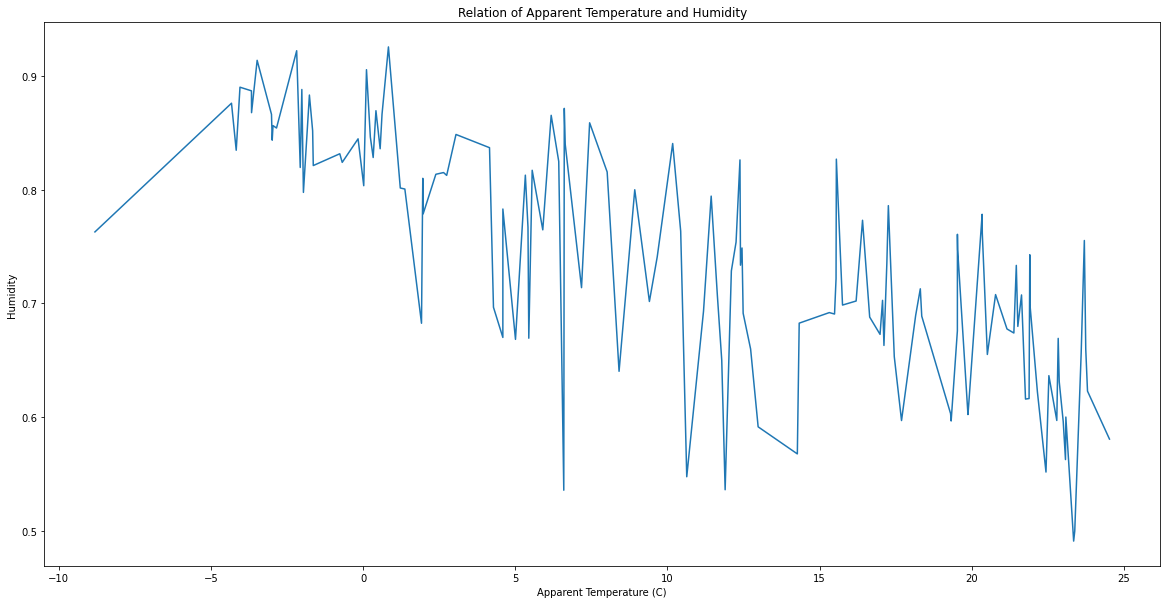

In [13]:
plt.figure(figsize=(20,10))
plt.title("Relation of Apparent Temperature and Humidity")
sns.lineplot(x="Apparent Temperature (C)",y="Humidity",data=df_month_sampling)

**5] Plot of Apparent Temperature and Humidity with year**

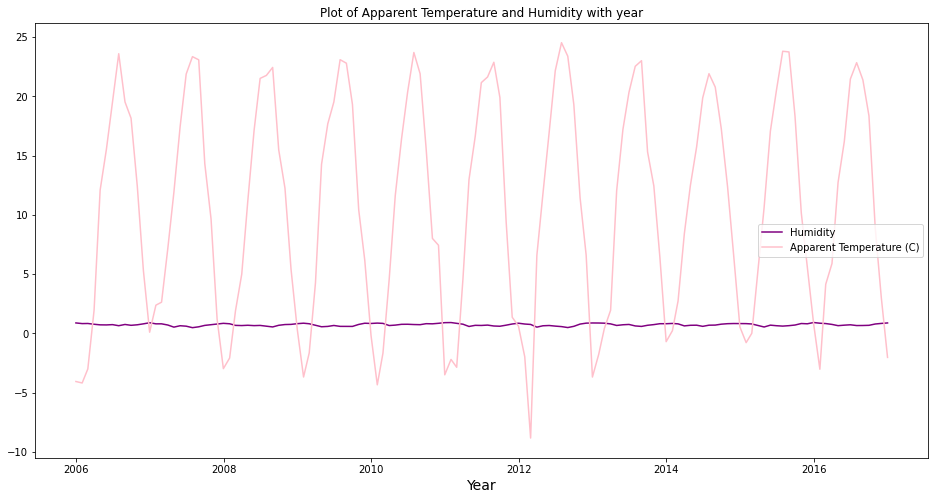

In [14]:
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year")
plt.plot(df_month_sampling['Humidity'],label='Humidity',color='Purple')
plt.plot(df_month_sampling['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='pink')
plt.xlabel("Year",fontsize="14")
plt.legend(loc=5,fontsize=10)


**6]  we need to find whether the for the month of a month say April starting from 2006 to 2016 and the for the same period have increased or not.**

In [15]:
april=df_month_sampling[df_month_sampling.index.month==4]

In [16]:
april

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-04-30 00:00:00+00:00,12.098827,0.728625
2007-04-30 00:00:00+00:00,11.894421,0.536361
2008-04-30 00:00:00+00:00,11.183688,0.693194
2009-04-30 00:00:00+00:00,14.267076,0.567847
2010-04-30 00:00:00+00:00,11.639406,0.706875
2011-04-30 00:00:00+00:00,12.978997,0.591625
2012-04-30 00:00:00+00:00,11.782770,0.650222
2013-04-30 00:00:00+00:00,12.045563,0.677667
2014-04-30 00:00:00+00:00,12.486181,0.691403


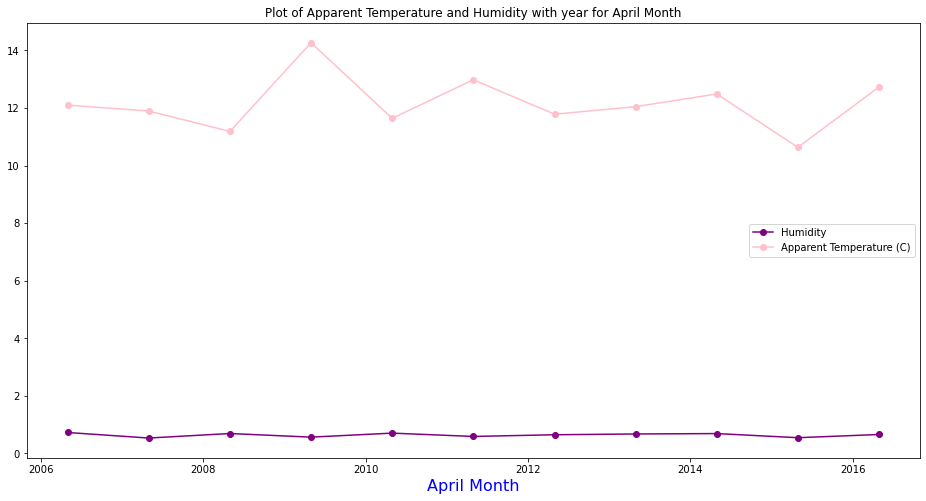

In [17]:
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for April Month")
plt.plot(april['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(april['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='pink',marker='o')
plt.xlabel('April Month',fontsize=16,color='Blue')
plt.legend(loc=5,fontsize=10)

`According to visulization of April month graph for year 2006 to 2016, the average humidity for all period is same. it not increasing nor descreasing. But there is vast change in temperature for 2008, 2009 and 2015 year majorly.`

**7]  This monthly analysis has to be done for all 12 months over the 10 year period. So basically after resampling data from hourly to monthly, then comparing the same month over the 10 year period.**

In [18]:
jan=df_month_sampling[df_month_sampling.index.month==1]
feb=df_month_sampling[df_month_sampling.index.month==2]
march=df_month_sampling[df_month_sampling.index.month==3]
april=df_month_sampling[df_month_sampling.index.month==4]
may=df_month_sampling[df_month_sampling.index.month==5]
june=df_month_sampling[df_month_sampling.index.month==6]
july=df_month_sampling[df_month_sampling.index.month==7]
august=df_month_sampling[df_month_sampling.index.month==8]
sept=df_month_sampling[df_month_sampling.index.month==9]
octo=df_month_sampling[df_month_sampling.index.month==10]
nov=df_month_sampling[df_month_sampling.index.month==11]
dec=df_month_sampling[df_month_sampling.index.month==12]

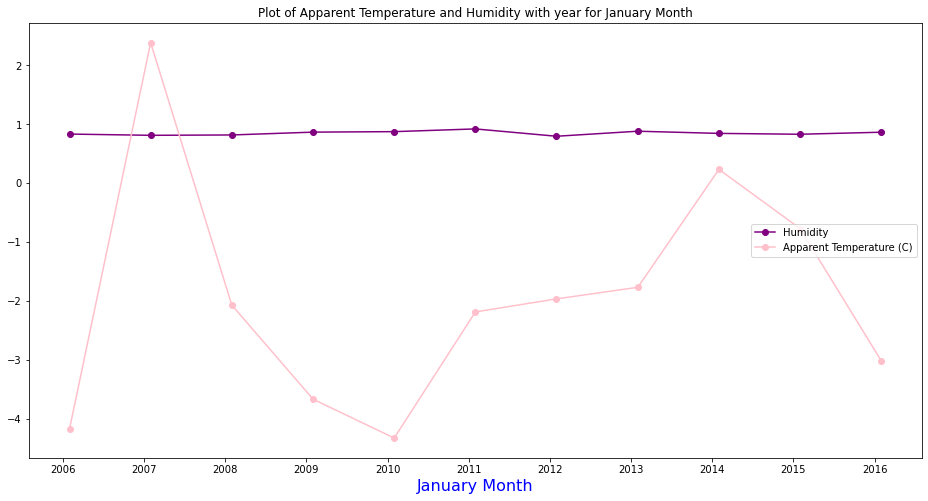

In [19]:
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for January Month")
plt.plot(jan['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(jan['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='pink',marker='o')
plt.xlabel('January Month',fontsize=16,color='Blue')
plt.legend(loc=5,fontsize=10)

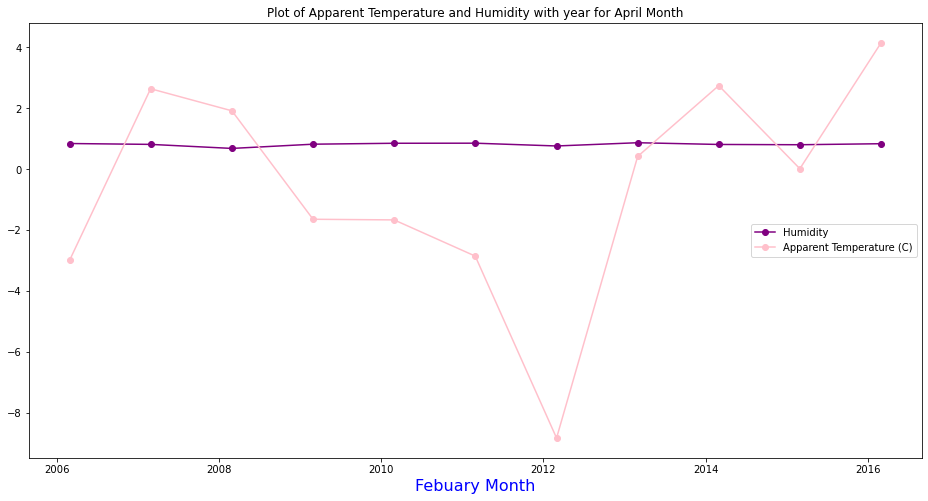

In [20]:
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for April Month")
plt.plot(feb['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(feb['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='pink',marker='o')
plt.xlabel('Febuary Month',fontsize=16,color='Blue')
plt.legend(loc=5,fontsize=10)

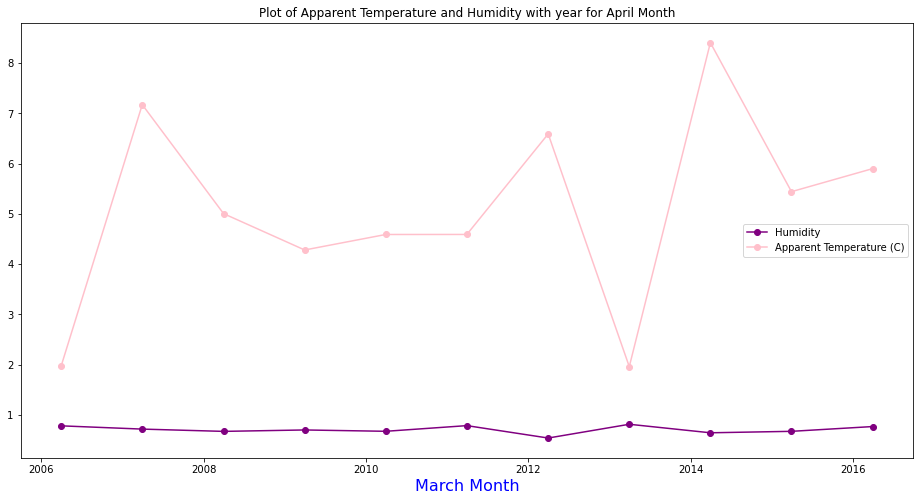

In [21]:
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for April Month")
plt.plot(march['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(march['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='pink',marker='o')
plt.xlabel('March Month',fontsize=16,color='Blue')
plt.legend(loc=5,fontsize=10)

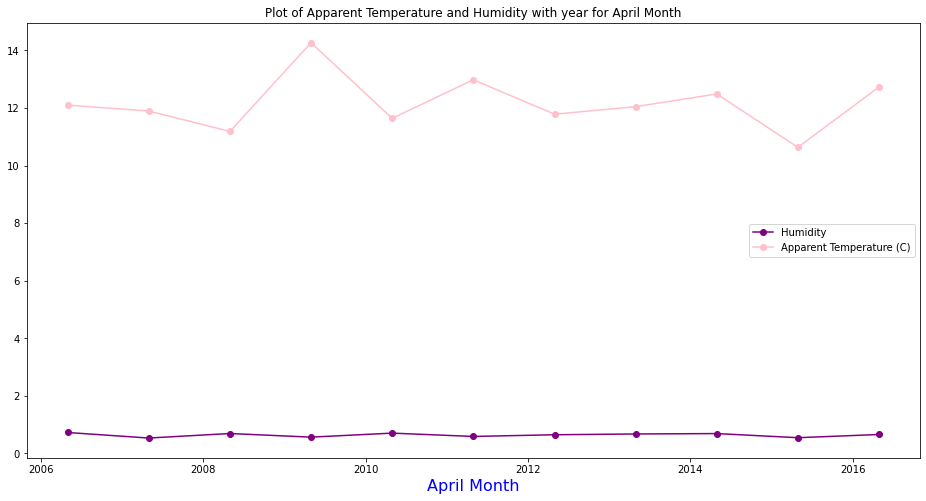

In [22]:
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for April Month")
plt.plot(april['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(april['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='pink',marker='o')
plt.xlabel('April Month',fontsize=16,color='Blue')
plt.legend(loc=5,fontsize=10)

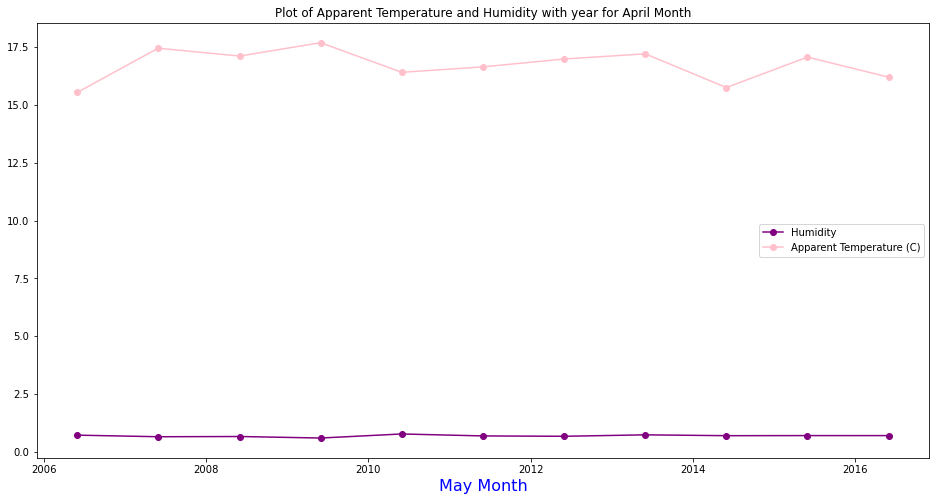

In [23]:
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for April Month")
plt.plot(may['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(may['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='pink',marker='o')
plt.xlabel('May Month',fontsize=16,color='Blue')
plt.legend(loc=5,fontsize=10)

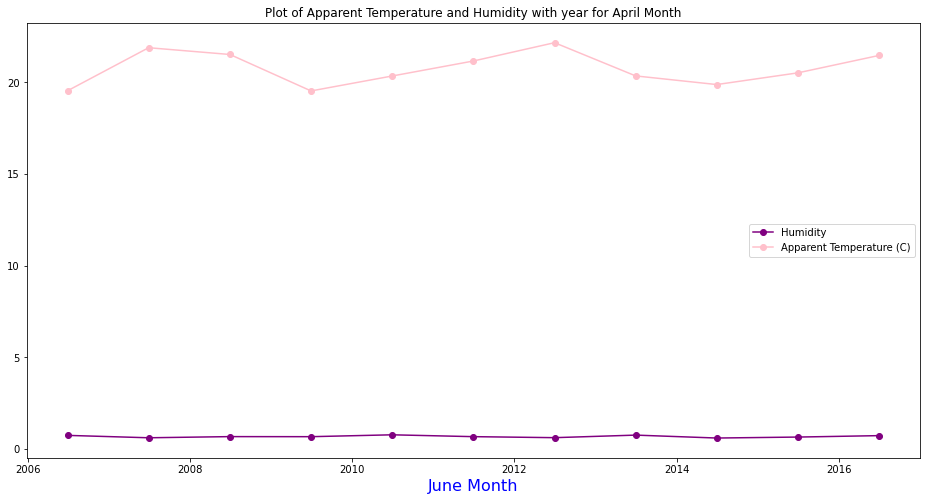

In [24]:
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for April Month")
plt.plot(june['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(june['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='pink',marker='o')
plt.xlabel('June Month',fontsize=16,color='Blue')
plt.legend(loc=5,fontsize=10)

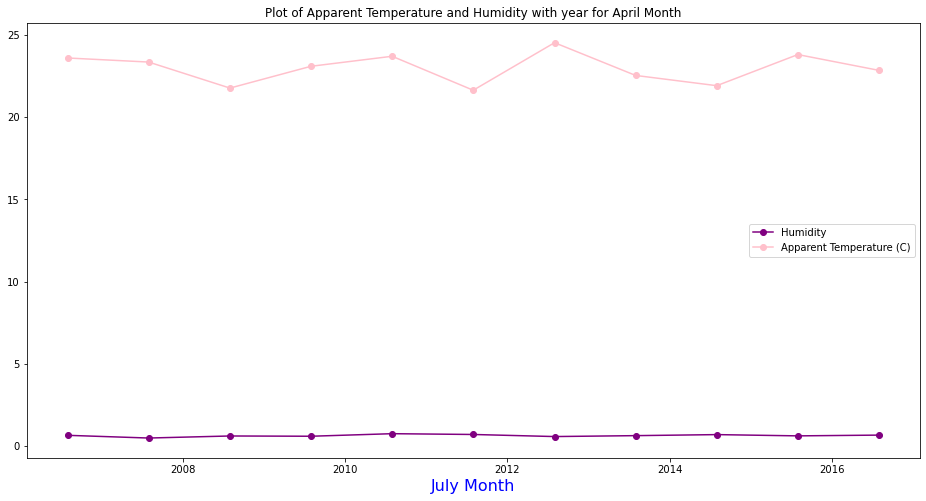

In [25]:
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for April Month")
plt.plot(july['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(july['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='pink',marker='o')
plt.xlabel('July Month',fontsize=16,color='Blue')
plt.legend(loc=5,fontsize=10)

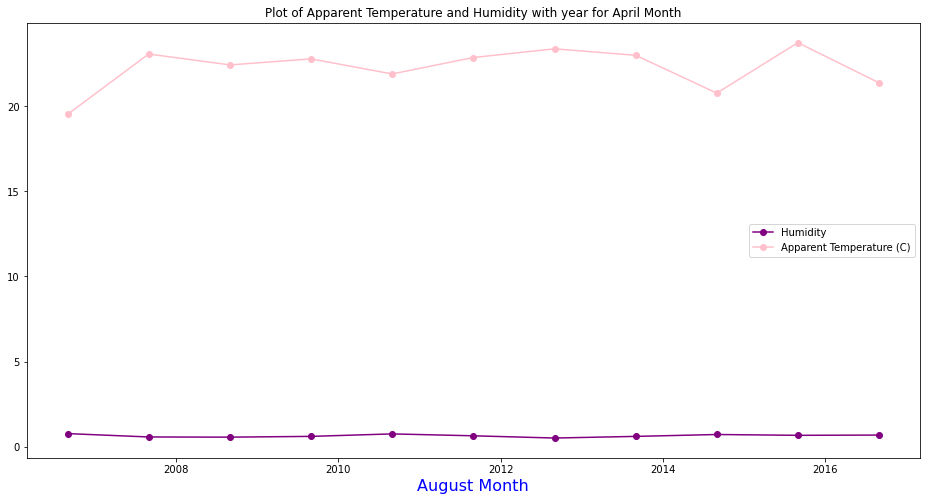

In [26]:
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for April Month")
plt.plot(august['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(august['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='pink',marker='o')
plt.xlabel('August Month',fontsize=16,color='Blue')
plt.legend(loc=5,fontsize=10)

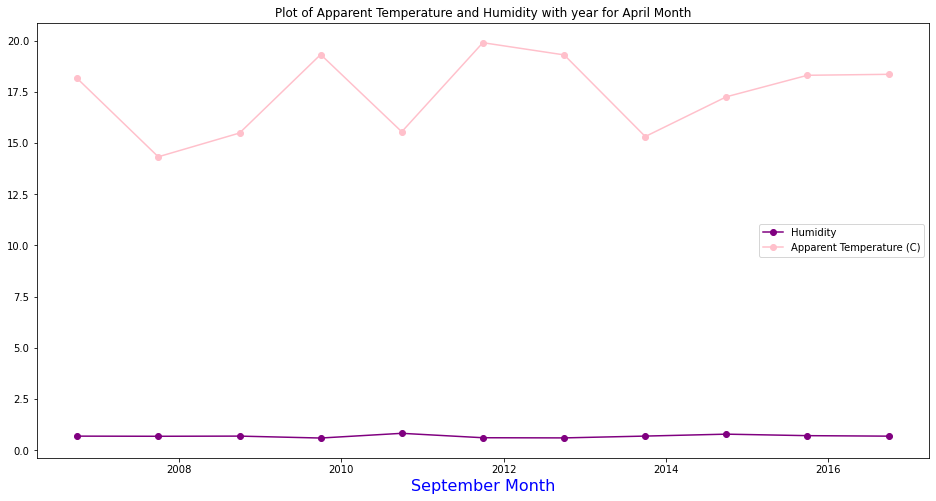

In [27]:
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for April Month")
plt.plot(sept['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(sept['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='pink',marker='o')
plt.xlabel('September Month',fontsize=16,color='Blue')
plt.legend(loc=5,fontsize=10)

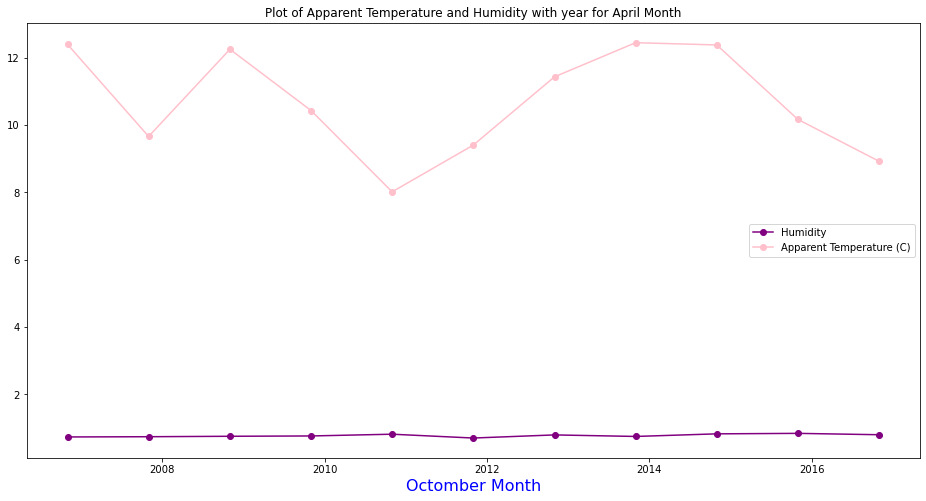

In [28]:
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for April Month")
plt.plot(octo['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(octo['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='pink',marker='o')
plt.xlabel('Octomber Month',fontsize=16,color='Blue')
plt.legend(loc=5,fontsize=10)

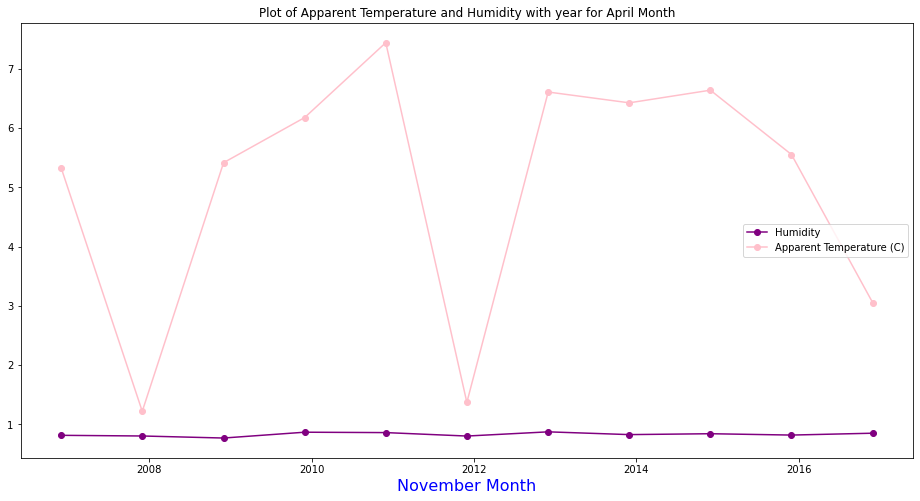

In [29]:
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for April Month")
plt.plot(nov['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(nov['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='pink',marker='o')
plt.xlabel('November Month',fontsize=16,color='Blue')
plt.legend(loc=5,fontsize=10)

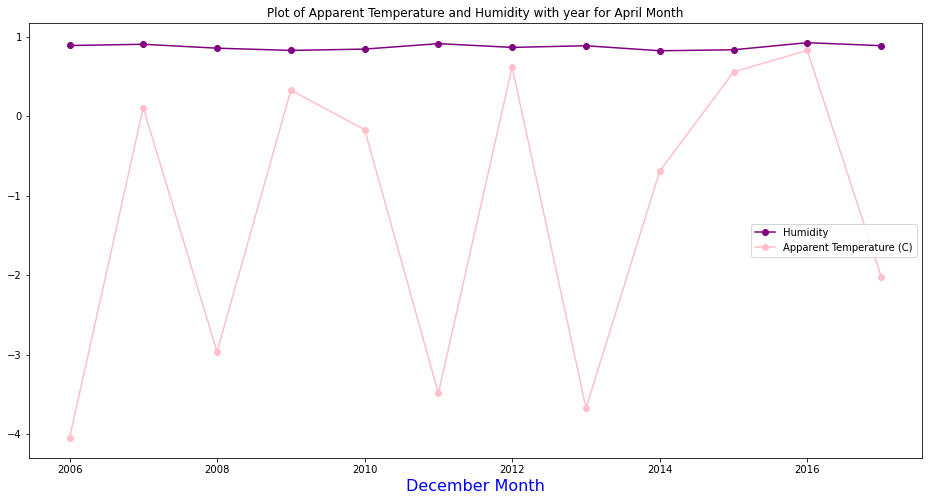

In [30]:
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for April Month")
plt.plot(dec['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(dec['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='pink',marker='o')
plt.xlabel('December Month',fontsize=16,color='Blue')
plt.legend(loc=5,fontsize=10)

`Conclusion:`

1. Average Apparent Temperature (c) increase for year 2008-09 and then again decrease from 2009-10 to its average level. Then slighlty increase for period 2010-11 and then drop again for year 2011-12. For year 2014-15 it decrease drastically and then come to average level for year 2015-16.

2. It observed, for year 2009 the Apparent Temperature is at Highest 14.26(C) and for year 2015 the Apparent Temperature is at lowest 10.63(C).
3. There is no any change in average Humidity for given year 2006-2016. The humidity graph line is approximately parallel to the X-axis.